Estimación de parámetros en modelos de regresión univariados
===

* 16:58 min | Ultima modificación: Marzo 29, 2021 | [YouTube](https://youtu.be/VQME3Bejbo4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

## Definición del problema de regresión univariada

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

In [2]:
#
# Datos del problema
# 
x = [
    0.1087, 0.2698, 0.3765, 0.2146, 0.9155, 
    0.0246, 0.0221, 0.8632, 0.6460, 0.2092,
    0.8567, 0.1591, 0.9647, 0.6231, 0.7460,
    0.3654, 0.3065, 0.6886, 0.4966, 0.2008,
    0.2618, 0.7607, 0.1563, 0.4424, 0.7731,
]

d = [
    0.9519, 1.1237, 1.2360, 1.0526, 2.0743,
    0.7906, 0.7603, 2.0533, 1.6887, 1.0563,
    2.0991, 0.8953, 2.1917, 1.6266, 1.8508,
    1.2828, 1.2283, 1.8722, 1.4657, 1.0418,
    1.1097, 1.7826, 0.9711, 1.4267, 1.8248,
]

En otras palabras, se desean encontrar los parámetros $w_0$ y $w_1$ de la recta 

$$y_i = w_0 + w_1 * x_i$$

que minimicen la suma de los errores cuadráticos entre el valor real $d_i$ y el valor pronósticado $y_i$ para cada valor posible de la variable $x_i$, tal como se ilustra en la gráfica de abajo. El error $e_i$ se define como $d_i - y_i$.  

![reg](assets/sdg-1.jpg)

## Función de pérdida

Se desea encontrar la combinación de parámetros $w_0$ y $w_1$ que minimice:

$$
\begin{split}
\text{SSE} & =  \sum_i e_i^2 \\
    & =  \sum_i (d_i - y_i)^2 \\
    & = \sum_i (d_i - w_0 - w_1 x_i)^2 
\end{split}
$$

Note que en la ecuación anterior, los valores de $x_i$ y $d_i$ son constantes que corresponden a la tabla de datos presentada en la formulación del problema, mientras que las variables son $w_0$ y $w_1$, de tal forma que:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - w_0 - w_1 x_i)^2 $$

## Pronóstico del modelo

In [ ]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def SSE(w0, w1):
    return sum([(di - w0 - w1 * xi) ** 2 for xi, di in zip(x, d)])

In [63]:
def plot_forecast(w0, w1):

    #
    # Generación de una secuencia de puntos
    # igualmente espaciados
    #
    z = np.linspace(0.0, 1.0)

    #
    # Cómputo de la salida del modelo
    #
    y = w0 + w1 * z

    #
    # Datos originales
    #
    plt.figure(figsize=(8, 8))
    plt.plot(x, d, "o", color="tab:blue")

    #
    # Pronóstico con el modelo
    #
    plt.plot(z, y, "-", color="tab:blue", linewidth=3)

    plt.title(
        "SSE=" + str(round(SSE(w0, w1), 4)),
        fontsize=16,
    )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

In [ ]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def SSE(w0, w1):
    return sum([(di - w0 - w1 * xi) ** 2 for xi, di in zip(x, d)])

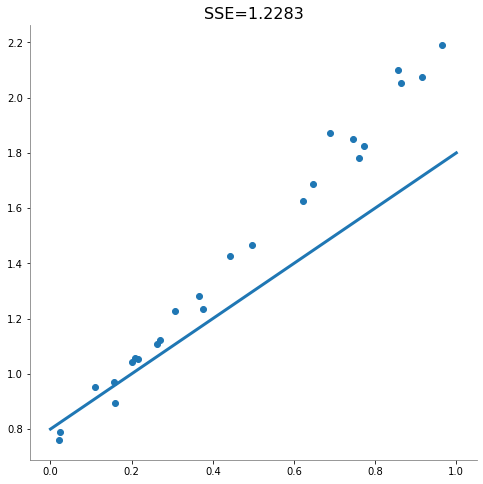

In [64]:
#
# Pronóstico para valores arbitrarios de w0 y w1
#
plot_forecast(w0=0.8, w1=1)

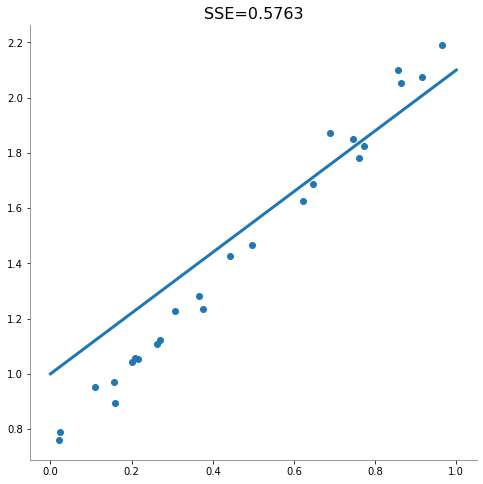

In [75]:
#
# Pronóstico para valores arbitrarios de w0 y w1
#
plot_forecast(w0=1.0, w1=1.1)

## Forma de la superficie de la función de pérdida

Ya que la función SSE() depende únicamente de los valores de $w_0$ y $w_1$, es posible graficar su forma.

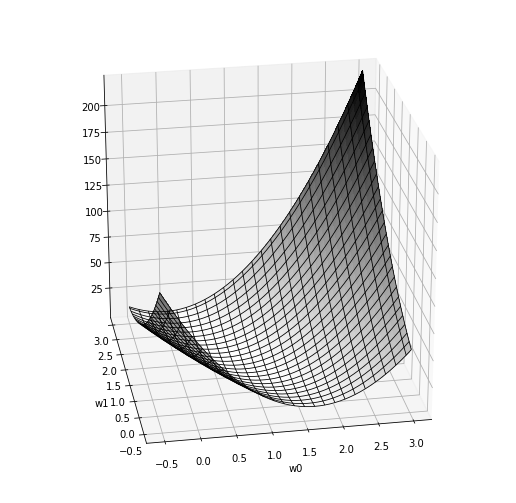

In [66]:
def plot_surface():
    #
    # Generación de una malla de puntos
    # y valor del SSE en cada punto
    #
    W0 = np.linspace(-0.5, 3.0, 50)
    W1 = np.linspace(-0.5, 3.0, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = SSE(W0, W1)

    #
    # Superficie de error
    #
    fig = plt.figure(figsize=(9, 9))
    ax = fig.gca(
        projection="3d",
        azim=-100,
        elev=25,
    )
    ax.plot_surface(
        W0,
        W1,
        F,
        cmap=cm.binary,
        linewidth=1,
        antialiased=False,
    )
    ax.plot_wireframe(
        W0,
        W1,
        F,
        color="black",
        linewidth=0.8,
        alpha=1.0,
        rstride=2,
        cstride=2,
    )

    plt.xlabel("w0")
    plt.ylabel("w1")


plot_surface()
plt.show()

## Contorno de la función de pérdida

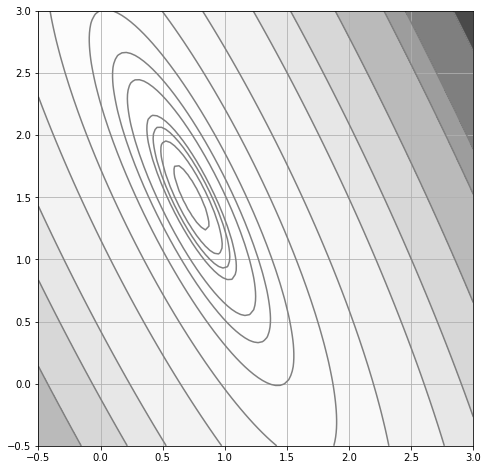

In [67]:
def plot_contour():

    W0 = np.linspace(-0.5, 3.0, 100)
    W1 = np.linspace(-0.5, 3.0, 100)
    W0, W1 = np.meshgrid(W0, W1)
    F = SSE(W0, W1)
    
    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60, 90, 130, 150, 200, 250]

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect("equal", "box")

    ax.contourf(
        W0,
        W1,
        F,
        cmap=cm.Greys,
        levels=levels,
        alpha=0.8,
    )

    ax.contour(
        W0,
        W1,
        F,
        colors="gray",
        levels=levels,
    )
    ax.grid()


plot_contour()

En términos de optimización, se desea encontrar las coordenadas $(w_0, w_1)$ del punto más bajo (error mínimo) de la superficie de error.

La función de error es una cuadrática (forma de tazón) con un único punto de mínima global.

## Gradiente algebraico de la función de pérdida

La función de pérdida está definida como:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - w_0 - w_1 x_i)^2 $$



La derivada respecto a $w_0$ es:

$$
\begin{split}
    \frac{\partial}{\partial w_0} \text{SSE}(w_0, w_1) 
        & = \frac{\partial}{\partial w_0} \sum_i (d_i - y_i)^2 \\
        & = \frac{\partial}{\partial w_0} \sum_i (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i \frac{\partial}{\partial w_0} (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i 2 \times (d_i - w_0 - w_1 x_i) \times  \frac{\partial}{\partial w_0} (d_i - w_0 - w_1 x_i) \\
        & = \sum_i 2 \times e_i \times  (-1) \\
        & = -2 \sum_i e_i \\
\end{split}
$$

La derivada respecto a $w_1$ es:

$$
\begin{split}
    \frac{\partial}{\partial w_1} \text{SSE}(w_0, w_1) 
        & = \frac{\partial}{\partial w_1} \sum_i (d_i - y_i)^2 \\
        & = \frac{\partial}{\partial w_1} \sum_i (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i \frac{\partial}{\partial w_1} (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i 2 * (d_i - w_0 - w_1 x_i) \times  \frac{\partial}{\partial w_1} (d_i - w_0 - w_1 x_i) \\
        & = \sum_i 2 * e_i \times  (-x_i) \\
        & = -2 \sum_i e_i x_i \\
\end{split}
$$

Si los parámetros $w_0$ y $w_1$ se agrupan en el vector de parámetros $\mathbf{w}=[w_0, w_1]'$, entonces:

$$
\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}) = 
\left[
  \begin{array}{c}
  -2 \sum_i  e_i
  \\
  -2 \sum_i  e_i x_i
  \end{array}
\right]
$$

## Codificación del gradiente

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

De esta forma, la función que computa el gradiente se implementa como:

In [68]:
def gSSE(w0, w1):
    #
    # Calculo del vector de errores
    #
    e = [(di - w0 - w1 * xi) for xi, di in zip(x, d)]

    #
    # Cómputo de los gradientes
    #
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([ei * xi for ei, xi in zip(e, x)])

    #
    # Retorna el gradiente como una tupla
    #
    return gw0, gw1

## Ecuación de mejora

A partir de las definiciones y cómputos anteriores, es posible implementar el proceso iterativo de mejora de los pesos usando la ecuación:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

In [69]:
def mejora(w0, w1, mu):
    #
    # Computo del gradiente para los parámetros actuales
    #
    gw0, gw1 = gSSE(w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    #  Parámetros corregidos
    #
    return w0, w1

## Proceso iterativo

Para realizar la optimización numérica, se parte de unos pesos iniciales aleatorios.

w0 = 0.675531238843588; w1 = 1.6432693468565847; SSE = 0.09853907887667793


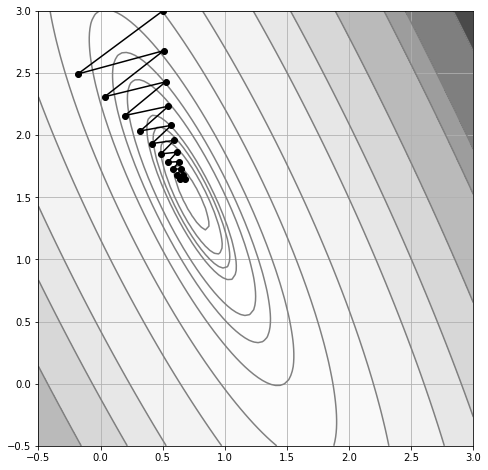

In [70]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [SSE(w0, w1)]

for epoch in range(20):
    w0, w1 = mejora(w0, w1, 0.03)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, marker='o', color="black");

In [69]:
def mejora(w0, w1, mu):
    #
    # Computo del gradiente para los parámetros actuales
    #
    gw0, gw1 = gSSE(w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    #  Parámetros corregidos
    #
    return w0, w1

In [69]:
def mejora(w0, w1, mu):
    #
    # Computo del gradiente para los parámetros actuales
    #
    gw0, gw1 = gSSE(w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    #  Parámetros corregidos
    #
    return w0, w1

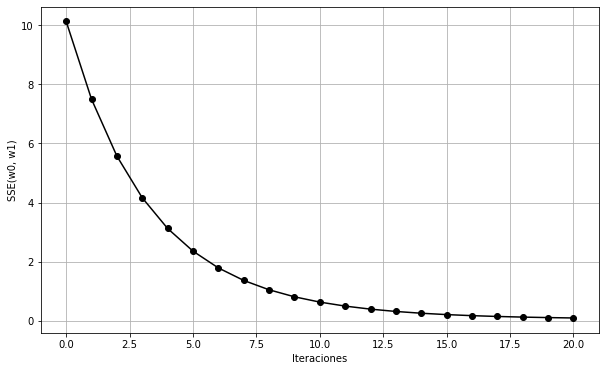

In [73]:
plt.figure(figsize=(10,6))
plt.plot(history_f, "o-k")
plt.xlabel('Iteraciones')
plt.ylabel('SSE(w0, w1)')
plt.grid()

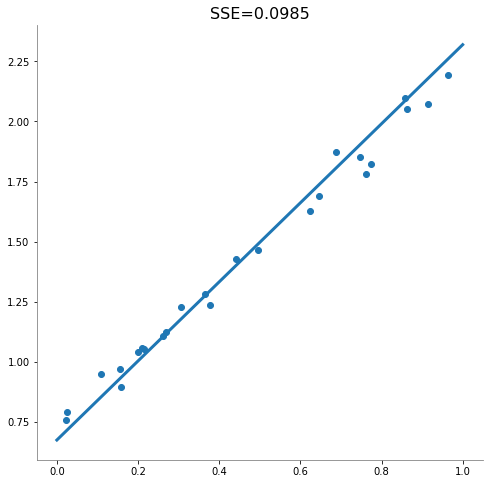

In [72]:
#
# A continuación se grafica la recta encontrada.
#
plot_forecast(w0=w0, w1=w1)

**Pregunta.---** El valor reportado para los parámetros $w_0$ y $w_1$ es el óptimo o puede mejorarse?